Згенеровано 1000 зразків.
Форма даних X: (1000, 1), Форма даних y: (1000,)

 Дані нормалізовано 
Середнє X_train після нормалізації (має бути близьке до 0): -0.00
Стандартне відхилення X_train після нормалізації (має бути близьке до 1): 1.00

 Розподіл вибірок
Розмір навчальної вибірки (70%): 700 зразків
Розмір тестової вибірки (30%): 300 зразків

 Вибір найкращого K 
Найкраще K (за мінімальним MSE): 18 (MSE: 103.66)
Найкраще K (за максимальним R²): 18 (R²: 0.71)


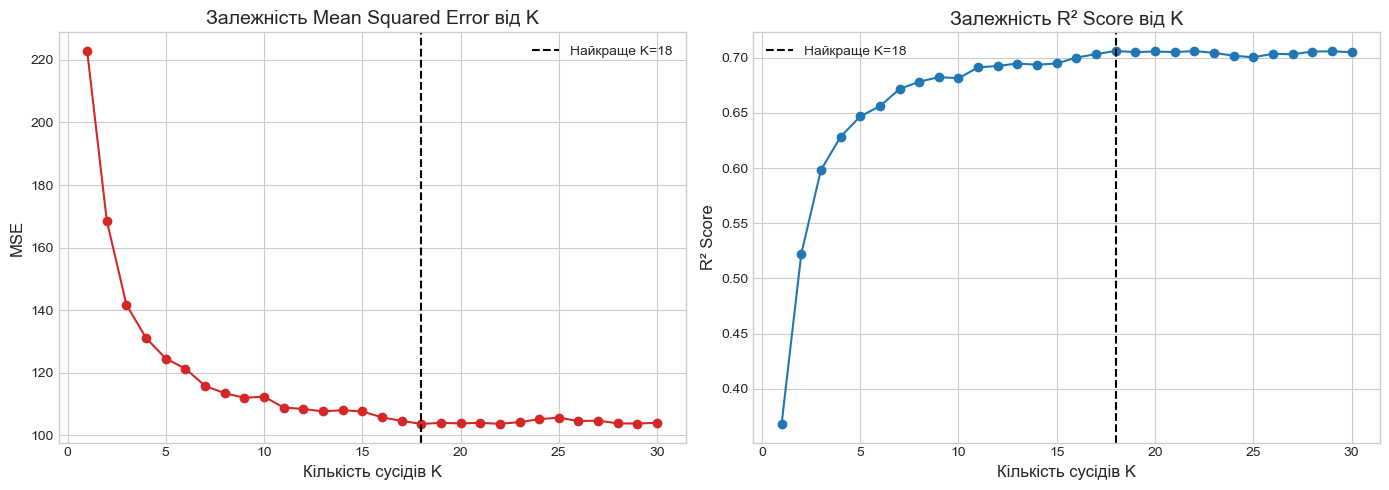

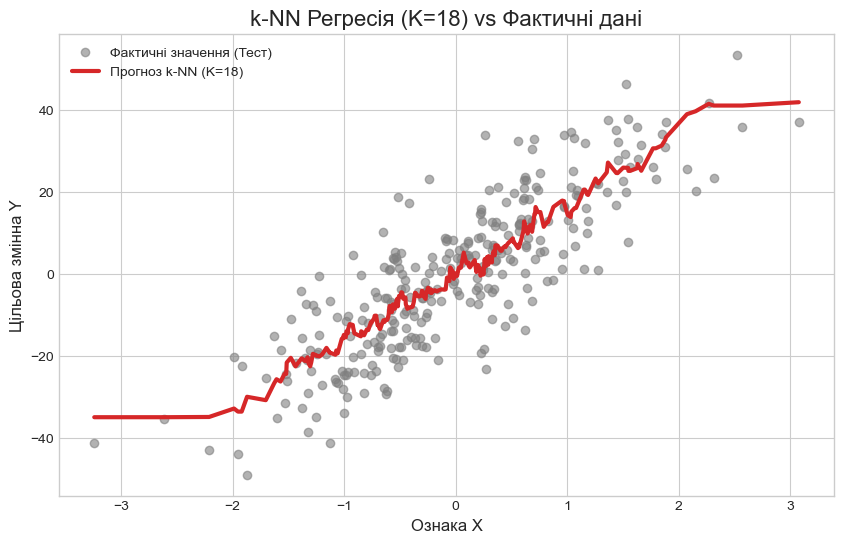

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression
import warnings
warnings.filterwarnings("ignore") 
plt.style.use('seaborn-v0_8-whitegrid')

X, y = make_regression(n_samples=1000, n_features=1, noise=10, random_state=42)
print(f"Згенеровано {len(X)} зразків.")
print(f"Форма даних X: {X.shape}, Форма даних y: {y.shape}")

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

print("\n Дані нормалізовано ")
print(f"Середнє X_train після нормалізації (має бути близьке до 0): {np.mean(X_train):.2f}")
print(f"Стандартне відхилення X_train після нормалізації (має бути близьке до 1): {np.std(X_train):.2f}")

print(f"\n Розподіл вибірок")
print(f"Розмір навчальної вибірки (70%): {len(X_train)} зразків")
print(f"Розмір тестової вибірки (30%): {len(X_test)} зразків")

k_values = range(1, 31)
mse_scores = []
r2_scores = []

for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    
    knn_regressor.fit(X_train, y_train)
    
    y_pred = knn_regressor.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    mse_scores.append(mse)
    r2_scores.append(r2)

best_k_mse = k_values[np.argmin(mse_scores)]
min_mse = np.min(mse_scores)

best_k_r2 = k_values[np.argmax(r2_scores)]
max_r2 = np.max(r2_scores)

print(f"\n Вибір найкращого K ")
print(f"Найкраще K (за мінімальним MSE): {best_k_mse} (MSE: {min_mse:.2f})")
print(f"Найкраще K (за максимальним R²): {best_k_r2} (R²: {max_r2:.2f})")

best_k = best_k_mse 

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, mse_scores, marker='o', linestyle='-', color='tab:red')
plt.title('Залежність Mean Squared Error від K', fontsize=14)
plt.xlabel('Кількість сусідів K', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.axvline(best_k_mse, color='k', linestyle='--', label=f'Найкраще K={best_k_mse}')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(k_values, r2_scores, marker='o', linestyle='-', color='tab:blue')
plt.title('Залежність R² Score від K', fontsize=14)
plt.xlabel('Кількість сусідів K', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.axvline(best_k_r2, color='k', linestyle='--', label=f'Найкраще K={best_k_r2}')
plt.legend()

plt.tight_layout()
plt.show()

final_knn_regressor = KNeighborsRegressor(n_neighbors=best_k)
final_knn_regressor.fit(X_train, y_train)
y_pred_final = final_knn_regressor.predict(X_test)

X_test_denormalized = X_test_raw.flatten() 

sort_idx = np.argsort(X_test_denormalized)
X_sorted = X_test_denormalized[sort_idx]
y_test_sorted = y_test[sort_idx]
y_pred_sorted = y_pred_final[sort_idx]

plt.figure(figsize=(10, 6))
plt.scatter(X_sorted, y_test_sorted, color='gray', label='Фактичні значення (Тест)', alpha=0.6)
plt.plot(X_sorted, y_pred_sorted, color='tab:red', linewidth=3, label=f'Прогноз k-NN (K={best_k})')
plt.title(f'k-NN Регресія (K={best_k}) vs Фактичні дані', fontsize=16)
plt.xlabel('Ознака X', fontsize=12)
plt.ylabel('Цільова змінна Y', fontsize=12)
plt.legend()
plt.show()
